In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import glob
import pickle

from IPython.display import display 
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
img_name = []
for i in range(90, 130, 10):
#     img_name = glob.glob('../sample_image/pracimg_name/resize/'+str(i)+'/*.png')
    tmp = glob.glob('../sample_image/pracimages/resize4/'+str(i)+'/*.png')
    img_name.append(tmp)

In [3]:
img_name = img_name[0] + img_name[1] + img_name[2] + img_name[3]

In [4]:
pid = []
weight = []
images = []
for i, img in zip(range(len(img_name)), img_name):
    if img_name[i][37] == '/':
        pid.append(img_name[i][38:46])
        weight.append(img_name[i][47:52])
    else:
        pid.append(img_name[i][39:47])
        weight.append(img_name[i][48:53])
    
#     img = cv2.imread(img)
    img = cv2.imread(img)
    img = img[50:250, 0:500]
    images.append(img)
    
weight = np.array(weight).astype(int)
weight = weight/100

In [5]:
df = pd.DataFrame(data={'pid': pid, 'weight': weight, 'images':images})
df.sort_values('pid', inplace=True)
df.reset_index(inplace=True, drop=True)
df.tail()

,images,pid,weight
555,"[[[81, 91, 90], [81, 91, 90], [81, 91, 90], [8...",p28img16,121.22
556,"[[[81, 91, 90], [81, 91, 90], [81, 91, 90], [8...",p28img17,124.70
557,"[[[81, 91, 90], [81, 91, 90], [81, 91, 90], [8...",p28img18,120.82
558,"[[[81, 91, 90], [81, 91, 90], [81, 91, 90], [8...",p28img19,121.72
559,"[[[81, 91, 90], [81, 91, 90], [81, 91, 90], [8...",p28img20,124.12


In [7]:
del pid, weight, img, images

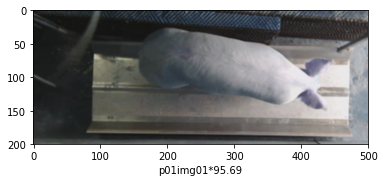

In [6]:
for i in range(len(df.images)):
    plt.imshow(df.images[i], interpolation='bicubic')
    plt.xlabel(df.pid[i]+ '*' +str(df.weight[i]))
    plt.show()
    break

In [7]:
df.images.tail()

555    [[[81, 91, 90], [81, 91, 90], [81, 91, 90], [8...
556    [[[81, 91, 90], [81, 91, 90], [81, 91, 90], [8...
557    [[[81, 91, 90], [81, 91, 90], [81, 91, 90], [8...
558    [[[81, 91, 90], [81, 91, 90], [81, 91, 90], [8...
559    [[[81, 91, 90], [81, 91, 90], [81, 91, 90], [8...
Name: images, dtype: object

In [8]:
len(df)

560